# BAF675 금융 빅데이터 분석 - Exercise 7

### Subject: Principal Component Analysis with PostgreSQL

### 김민희 (20204636)

# 1. Data Loading from PostgreSQL Server

In [22]:
import numpy as np
import pandas as pd
import psycopg2

In [23]:
from config import *

In [24]:
SERIES_ID_LIST = ['DTB3', 'DTB6', 'DGS1', 'DGS2', 'DGS3', 'DGS5', 'DGS10', 'DGS20', 'DGS30']

In [25]:
sql_conn_str = f'host={SQL_SERVER_ADDRESS} port={SQL_SERVER_PORT} ' \
        f'dbname={SQL_DATABASE} user={SQL_USER_ID} password={SQL_USER_PW}'

In [26]:
# 따옴표 씌우기
series_ids = [f"'{x}'" for x in SERIES_ID_LIST]

In [27]:
series_ids

["'DTB3'",
 "'DTB6'",
 "'DGS1'",
 "'DGS2'",
 "'DGS3'",
 "'DGS5'",
 "'DGS10'",
 "'DGS20'",
 "'DGS30'"]

In [28]:
series_ids = ','.join(series_ids)

In [29]:
print(series_ids)

'DTB3','DTB6','DGS1','DGS2','DGS3','DGS5','DGS10','DGS20','DGS30'


In [30]:
query = f"""
    select *
    from fred_series_values
    where series_id in ({series_ids})
"""

In [31]:
print(query)


    select *
    from fred_series_values
    where series_id in ('DTB3','DTB6','DGS1','DGS2','DGS3','DGS5','DGS10','DGS20','DGS30')



In [32]:
with psycopg2.connect(sql_conn_str) as conn:
    cur = conn.cursor()
    cur.execute(query)
    rows = cur.fetchall()

In [34]:
df = pd.DataFrame(rows, columns=['series_id', 'date', 'value'])

In [35]:
df.head()

,series_id,date,value
0,DTB3,1954-01-04,1.33
1,DTB3,1954-01-05,1.28
2,DTB3,1954-01-06,1.28
3,DTB3,1954-01-07,1.31
4,DTB3,1954-01-08,1.31


In [36]:
df.tail()

,series_id,date,value
135522,DGS20,2021-10-08,2.11
135523,DGS30,2021-10-05,2.10
135524,DGS30,2021-10-06,2.08
135525,DGS30,2021-10-07,2.13
135526,DGS30,2021-10-08,2.16


In [37]:
# format 변경
df_merged = df.pivot(index='date', columns='series_id', values='value')

In [39]:
df_merged = df_merged.rename(columns={
    'DTB3': '3m',
    'DTB6': '6m',
    'DGS1': '1y',
    'DGS2': '2y',
    'DGS3': '3y',
    'DGS5': '5y',
    'DGS10': '10y',
    'DGS20': '20y',
    'DGS30': '30y'
})

In [40]:
df_merged.tail()

series_id,1y,10y,2y,20y,3y,30y,5y,3m,6m
date,,,,,,,,,
2021-10-04,0.09,1.49,0.27,1.99,0.52,2.05,0.95,0.04,0.06
2021-10-05,0.09,1.54,0.28,2.04,0.54,2.10,0.98,0.04,0.06
2021-10-06,0.10,1.53,0.30,2.02,0.55,2.08,0.99,0.04,0.06
2021-10-07,0.10,1.58,0.32,2.08,0.57,2.13,1.02,0.05,0.06
2021-10-08,0.09,1.61,0.32,2.11,0.59,2.16,1.05,0.05,0.07


In [41]:
import matplotlib.pyplot as plt

In [42]:
plt.rcParams['figure.figsize'] = (10, 6)

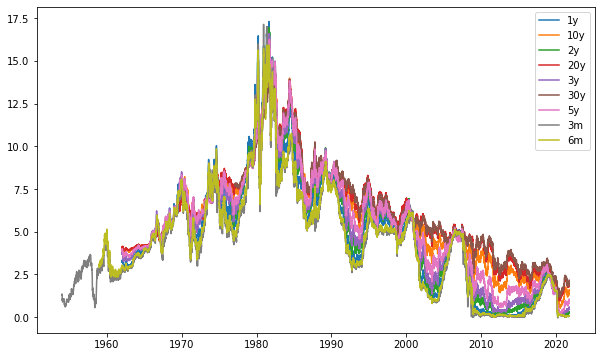

In [43]:
for col in df_merged.columns:
    plt.plot(df_merged[col].dropna(), label=col)

plt.legend()
plt.show()